In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing.image import ImageDataGenerator


In [38]:
train= pd.read_csv('/content/drive/MyDrive/dataset/ASL_TRAIN.csv')
test=pd.read_csv('/content/drive/MyDrive/dataset/ASL_TEST.csv')
train

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [18]:
classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [39]:
y_train=np.array(train['label'])
y_test=np.array(test['label'])
X_train=np.array(train.drop(columns=['label']))
X_test=np.array(test.drop(columns=['label']))


In [40]:
X_train.shape

(2012, 10000)

In [41]:
X_train=X_train/255.0
X_test=X_test/255.0

In [43]:
X_train=X_train.reshape(-1,100,100,1)
X_test=X_test.reshape(-1,100,100,1)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=36)

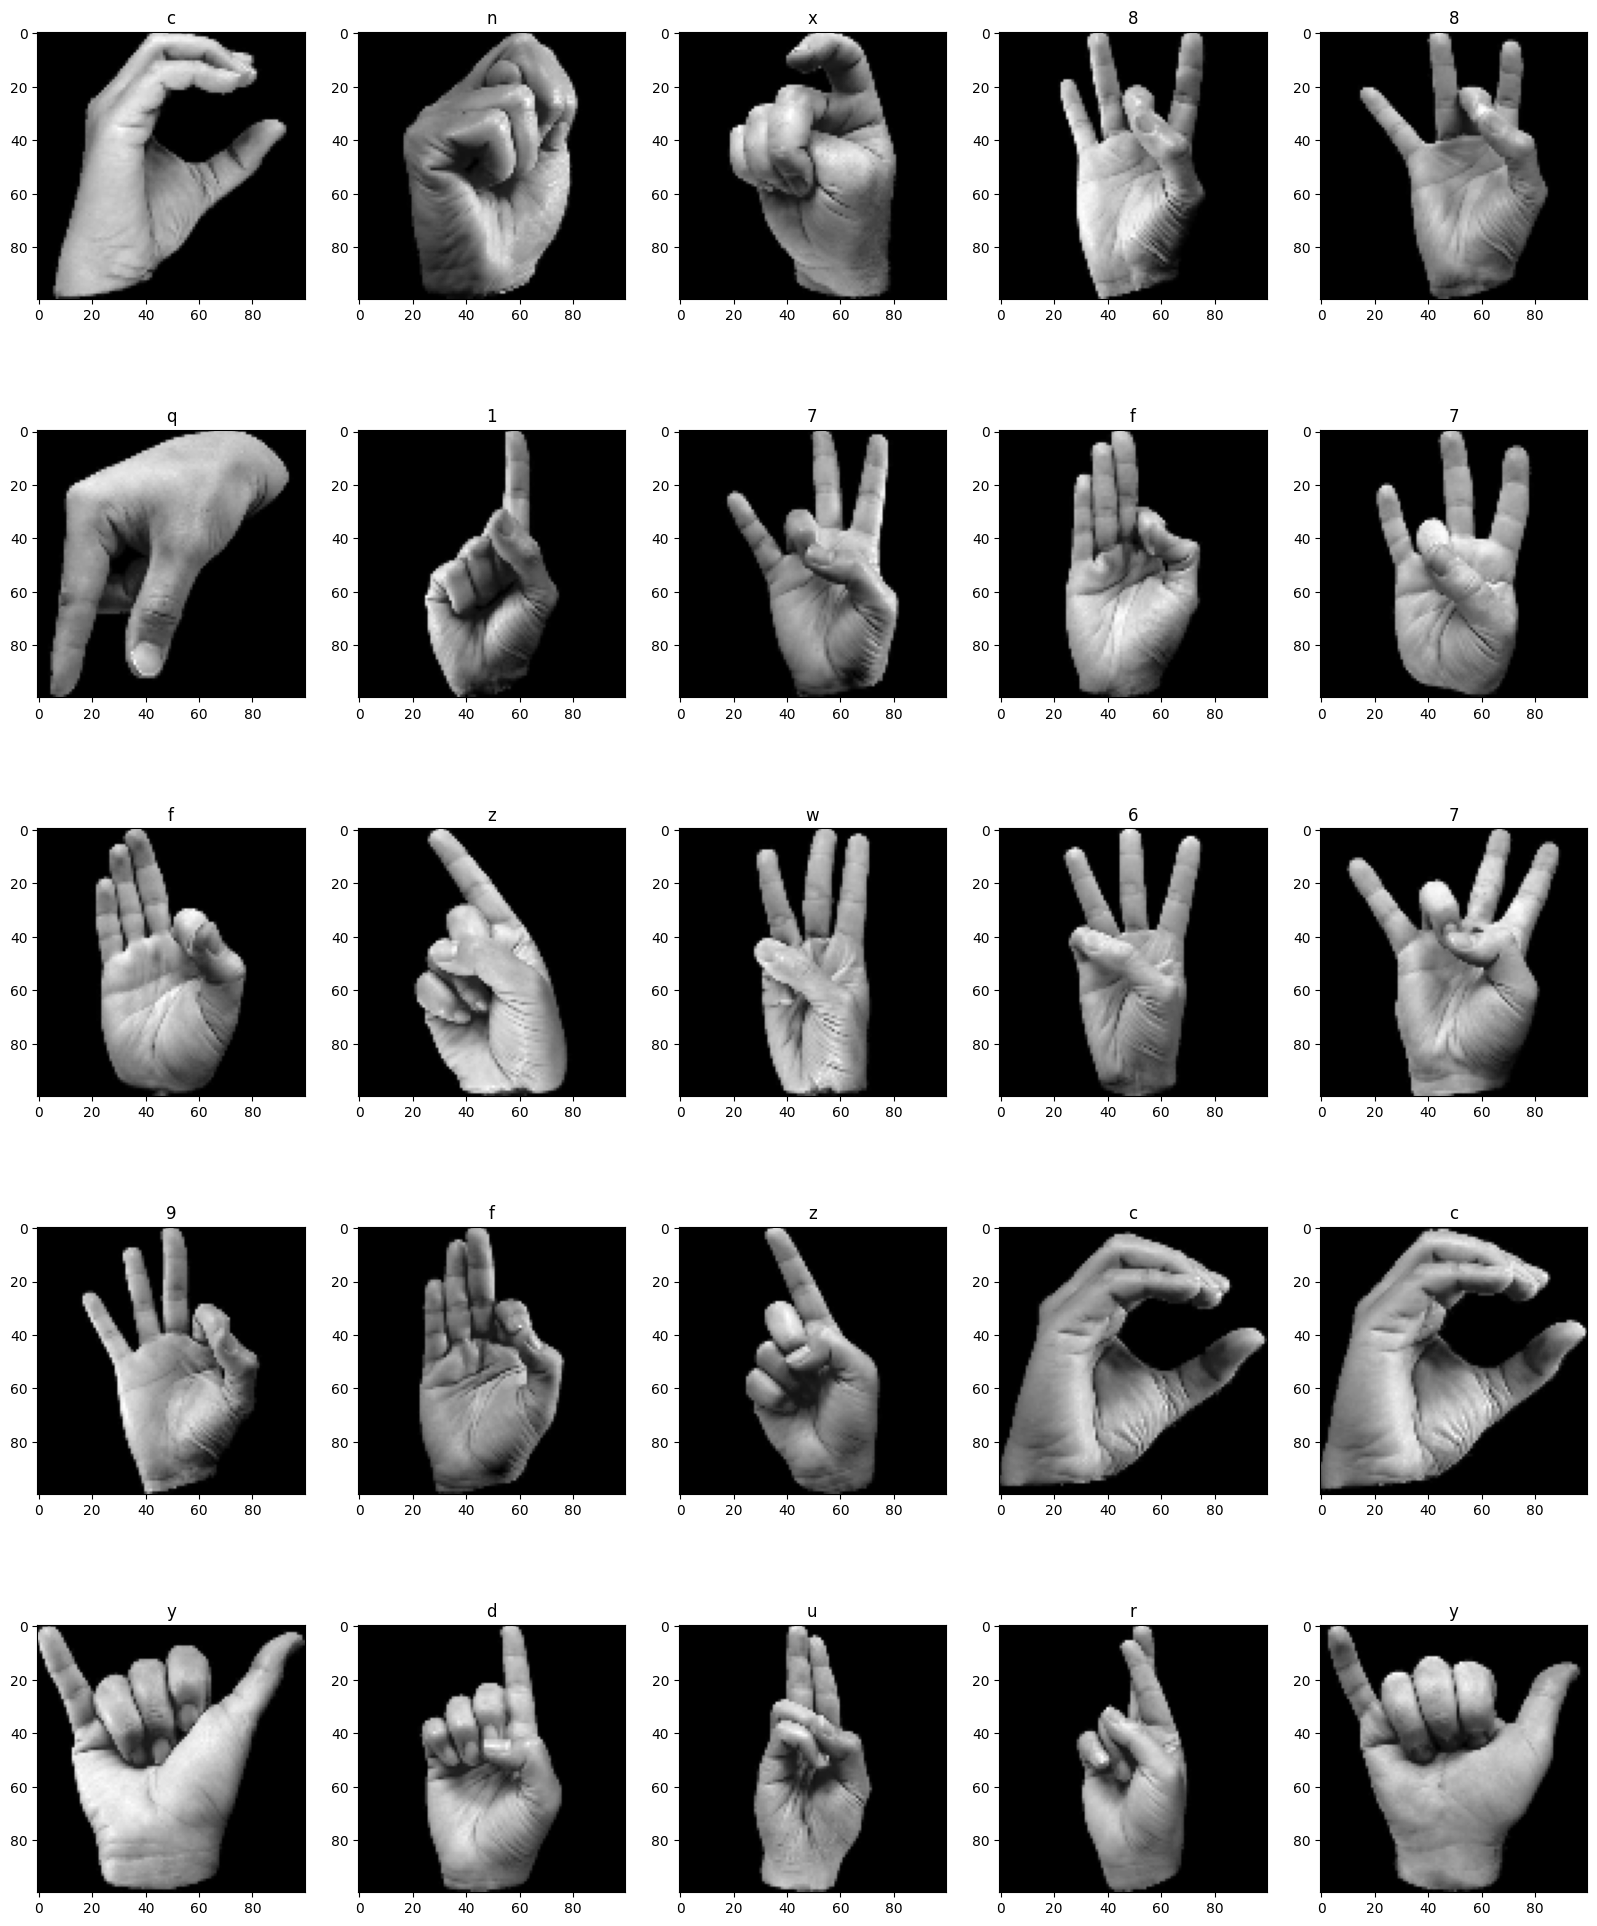

In [44]:
plt.figure(figsize=(20, 25))

for i in range(5*5):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i],cmap='gray')
    label = y_train[i]
    plt.title(classes[label])
    i+=1


In [24]:
# datagen = ImageDataGenerator(
#         validation_split=0.2,
#         rotation_range = 20,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image
#         shear_range = 0.3,# shear angle in counter-clockwise direction in degrees
#         width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
#         vertical_flip=True,
#         horizontal_flip=True,fill_mode='nearest')  # randomly flip images

In [53]:
def create_model_cnn(input_shape):
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=(5,5),  activation='relu', input_shape=input_shape),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2,2)),

        keras.layers.Flatten(),


        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(36, activation='softmax')
    ])

    return model

In [56]:
model = create_model_cnn((100,100, 1))
model.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.Adam(0.001),
                metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 96, 96, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 10, 10, 32)       

In [48]:
folder=r'/content/drive/MyDrive/Model/'#đường dẫn
checkpoint=tf.keras.callbacks.ModelCheckpoint(
    filepath=folder+'ep{epoch:02d}_asl_model_cnn_acc_{accuracy:.2f}_val_acc_{val_accuracy:.2f}.h5',#cộng thêm tên file cấu trúc
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [50]:
X_train.shape, X_val.shape, X_test.shape

((1609, 100, 100, 1), (403, 100, 100, 1), (503, 100, 100, 1))

In [57]:
epoch=500
batch_size=32
earlystopping = keras.callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="auto", patience = 10,
                                        restore_best_weights = True)
# lr_decay=keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.96 ** (x+epoch))
history=model.fit(X_train, y_train, batch_size=batch_size,
            epochs=epoch,
            validation_data=(X_val,y_val),verbose=1,
            callbacks=[checkpoint,earlystopping])

Epoch 1/500
51/51 [==============================] - 2s 16ms/step - loss: 2.2022 - accuracy: 0.3940 - val_loss: 0.6932 - val_accuracy: 0.7940
Epoch 2/500
15/51 [=======>......................] - ETA: 0s - loss: 0.6805 - accuracy: 0.7708

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


51/51 [==============================] - 1s 10ms/step - loss: 0.5914 - accuracy: 0.8104 - val_loss: 0.3285 - val_accuracy: 0.9032
Epoch 3/500
51/51 [==============================] - 0s 10ms/step - loss: 0.3252 - accuracy: 0.8881 - val_loss: 0.1879 - val_accuracy: 0.9504
Epoch 4/500
51/51 [==============================] - 0s 8ms/step - loss: 0.2046 - accuracy: 0.9285 - val_loss: 0.1354 - val_accuracy: 0.9504
Epoch 5/500
51/51 [==============================] - 1s 10ms/step - loss: 0.1525 - accuracy: 0.9503 - val_loss: 0.1229 - val_accuracy: 0.9553
Epoch 6/500
51/51 [==============================] - 1s 12ms/step - loss: 0.1240 - accuracy: 0.9534 - val_loss: 0.1104 - val_accuracy: 0.9628
Epoch 7/500
51/51 [==============================] - 1s 10ms/step - loss: 0.1027 - accuracy: 0.9615 - val_loss: 0.1151 - val_accuracy: 0.9578
Epoch 8/500
51/51 [==============================] - 1s 12ms/step - loss: 0.0695 - accuracy: 0.9758 - val_loss: 0.0707 - val_accuracy: 0.9727
Epoch 9/500
51/51 [

In [58]:
model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 21ms/step - loss: 0.1759 - accuracy: 0.9523


[0.1758665144443512, 0.9522863030433655]

In [59]:
model_history = pd.DataFrame(history.history)
# model_history=model_history.reset_index()
model_history.shape

(23, 4)

<Axes: >

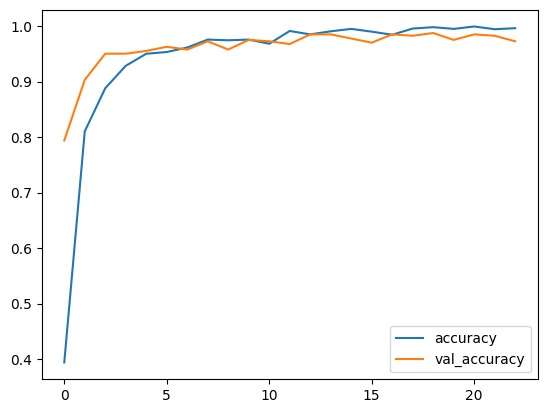

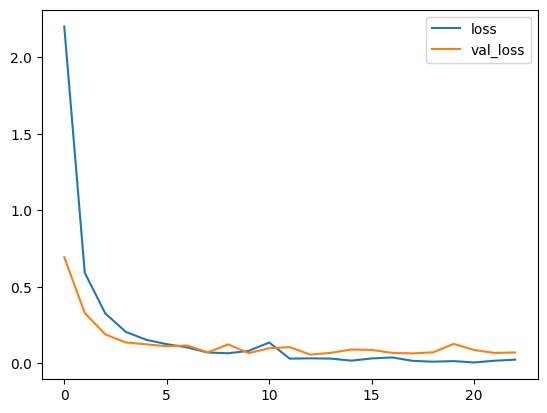

In [60]:
model_history.loc[:,['accuracy','val_accuracy']].plot()
model_history.loc[:,['loss','val_loss']].plot()

In [61]:
model.save('/content/drive/MyDrive/Model/cnn_100p_asl.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
